<a href="https://colab.research.google.com/github/Arkhtor98/Gestops/blob/main/gestops_single_order_vs_two_orders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#General definitions
First we need to define the numbers we're going to work with. We will work with simple numbers : Let $p$ be the price we can sell the good at, $c$ the cost of that good, $s$ the residual value if we cannot sell that good (note that it can be negative in case of a cost of disposal), and $c'$ the premium cost in the second order case.

$p = 100$ \\
$c = 30$ \\
$s = 10$ \\
$c' = 45$ \\

For the sake of this little experiment, I will generate $1000$ random numbers from a lognormal distribution for each volatility ranging from $0$ to $1$, with steps of $0.01$, which will give me $101$ volatilities to work with, so $101'000$ data points.

Let's also define our demand distribution. It will be log-normally distributed, with a median of $100$.


To not make the graphs insanely complicated, I will  take the mean and standard moments (standard deviation, 3 quartiles) of profits for each volatility, and plot them to compare both options : taking a bigger risk by not taking the option of ordering again, or playing it safe. I want to see if it depends on volatility, or if the dominance is stochastic (plus it allows me to train my Python skills).

Then I will start by importing the necessary libraries : matplotlib will be able to plot the data, math for the exponential function, numpy for arrays, pandas for data visualisation with dataframes, matplotlib for plotting, scipy for the normal inverse, and statistics for the standard deviation.

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
from scipy.stats import norm
import statistics

I will then generate $1000$ random numbers using the numpy library, and stock them in a dataframe to use them for both cases, which will allow me to compare them.

For simplicity's sake, I will take the approach seen in the lectures : generate a random z-score from a normal distribution, and find the demand associated.

In [2]:
# let's create tuples that will stock one volatility and a list of demands generated from a random number.
#our tuples will look like this : (volatility , [list of 1000 random numbers])

mean_normal = 1.605
median = 100
list_demands=[]
rng = np.random.default_rng()
columns = pd.Series(np.arange(1,1001)) #we generate a series which will contain our observations as headers
random_demand = pd.DataFrame(columns = columns) #we create an empty dataframe

for i in range(101):
  list_demands.clear()
  for j in range(1000):
    z = rng.normal() #generates a random z-score from a standardised normal distribution
    #find the associated order quantity
    n = math.exp(z*i/100)
    d = round(n*median,3) #rounding to 3 decimals 
    list_demands.append(d)
  random_demand.loc[i/100] = list_demands.copy()
  
random_demand.head() 
#we can see that we have the volatilities as indexes, and the observations as rows. We also notice that it is consistent with data, with the first row being the median


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000
0.00,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,...,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000
0.01,101.038,99.899,99.422,99.735,99.053,99.020,99.216,101.051,99.343,99.692,98.812,100.955,99.596,101.134,100.062,101.228,101.430,99.924,100.861,98.296,99.204,99.745,101.248,101.136,98.562,100.191,100.102,99.486,100.049,101.200,99.825,99.822,100.374,101.455,101.024,99.619,99.989,99.744,100.240,98.686,...,99.936,100.152,99.367,99.860,102.333,99.689,101.072,98.937,99.350,99.338,99.100,99.847,100.151,99.432,97.969,100.435,99.919,102.020,97.732,100.775,99.642,99.637,98.529,100.727,100.772,98.821,100.711,102.942,99.533,100.185,99.505,99.084,100.291,100.384,99.663,100.991,100.232,99.356,99.674,101.978
0.02,102.288,99.648,98.616,95.795,99.400,99.963,100.735,101.661,100.850,100.408,98.685,104.293,98.646,99.438,101.272,99.016,102.791,100.607,97.833,103.112,99.713,102.108,101.187,99.448,96.297,101.908,97.144,100.690,99.444,101.856,96.923,99.649,96.166,98.518,101.230,104.536,102.378,99.372,101.609,103.557,...,98.818,98.894,101.321,99.251,101.034,98.060,97.777,97.910,99.628,97.141,98.773,98.352,100.991,99.266,98.971,99.881,99.578,96.972,101.581,99.476,99.971,98.062,100.155,100.849,98.584,99.442,100.345,97.737,101.935,101.732,101.684,97.113,100.803,102.177,99.845,102.721,98.700,98.702,105.184,100.666
0.03,101.484,100.164,96.621,96.282,97.674,98.464,104.895,100.182,97.627,99.287,104.103,99.952,100.494,95.220,99.591,99.648,100.369,102.715,98.958,97.328,97.833,98.862,97.772,101.523,101.411,98.379,101.618,95.839,98.304,103.954,100.444,94.101,99.053,98.932,104.081,100.706,98.611,105.765,97.376,104.118,...,105.536,100.261,96.496,93.438,104.628,101.630,100.194,101.158,94.059,94.869,99.275,95.891,99.177,98.175,102.381,103.083,96.838,97.350,102.230,99.931,94.843,101.140,101.349,104.524,103.555,99.250,99.172,98.638,101.518,104.516,103.399,99.431,99.503,99.215,98.150,102.046,99.251,100.457,95.162,101.160
0.04,103.037,103.679,96.273,99.050,105.034,103.613,96.998,102.779,101.126,98.457,101.354,100.426,106.078,104.493,99.362,103.354,103.054,98.999,100.407,101.017,97.533,100.628,98.126,99.322,99.896,99.518,105.593,102.089,97.177,100.089,92.307,104.513,98.849,100.486,107.420,98.148,106.524,102.872,98.903,96.824,...,101.048,96.717,99.890,98.113,103.182,103.701,101.198,112.729,102.243,104.115,110.637,103.533,101.412,99.656,93.571,94.583,104.011,99.715,101.572,100.347,100.234,98.539,103.983,97.721,99.650,103.072,101.694,104.548,97.627,105.439,99.676,101.804,99.747,97.994,103.831,98.778,102.227,101.574,99.125,101.884


We now have our randomly generated demands. all we need to do is find the optimal order quantity, maximising profit, for both options.

#Single order

With a single order, it makes things relatively easy. We order a certain quantity : if we don't have enough, we miss on the underage stock, and if we order too much, we incur the overage stock. We can then have the profit as
$\pi = Q(p-c)$ if we order not enough, or $\pi = E(S)(p-c) + (Q-E(S))(s-c)$ if we order too much and have to liquidate the rest of the stock.

Once I have all the profits, I will take the mean, standard deviation and quartiles and put them into a dataframe that will help me for the graph.

We then need information about our order quantity. The newsvendor model gives us a critical fractile of $\frac{Cu}{Cu+Co} = \frac{p-c}{p-s}$ \\
With the information given above, it gives us a critical fractile $crit.fract = \frac{70}{90} \approx 0.778 $ \\
Now we need to determine the optimal order quantity.

In [3]:
price = 100
cost = 30
residual = 10
q = 0
crit_fract = 7/9
#z-score associated to the critical fractile
z = norm.ppf(crit_fract)
order_quantities = []
#one order quantity per volatility value
for i in range(101):
  q = math.exp(i/100*z)*median
  order_quantities.append((i/100,round(q,3)))

In [4]:
print(order_quantities)

[(0.0, 100.0), (0.01, 100.768), (0.02, 101.541), (0.03, 102.321), (0.04, 103.106), (0.05, 103.898), (0.06, 104.695), (0.07, 105.499), (0.08, 106.309), (0.09, 107.125), (0.1, 107.947), (0.11, 108.776), (0.12, 109.611), (0.13, 110.452), (0.14, 111.3), (0.15, 112.154), (0.16, 113.015), (0.17, 113.883), (0.18, 114.757), (0.19, 115.638), (0.2, 116.526), (0.21, 117.42), (0.22, 118.322), (0.23, 119.23), (0.24, 120.145), (0.25, 121.067), (0.26, 121.997), (0.27, 122.933), (0.28, 123.877), (0.29, 124.828), (0.3, 125.786), (0.31, 126.752), (0.32, 127.725), (0.33, 128.705), (0.34, 129.693), (0.35, 130.689), (0.36, 131.692), (0.37, 132.703), (0.38, 133.722), (0.39, 134.748), (0.4, 135.782), (0.41, 136.825), (0.42, 137.875), (0.43, 138.933), (0.44, 140.0), (0.45, 141.075), (0.46, 142.158), (0.47, 143.249), (0.48, 144.349), (0.49, 145.457), (0.5, 146.573), (0.51, 147.698), (0.52, 148.832), (0.53, 149.975), (0.54, 151.126), (0.55, 152.286), (0.56, 153.455), (0.57, 154.633), (0.58, 155.82), (0.59, 157.

Now comes the interesting part (the part where I suffer because I'm not agile in python) : we determine the profit associated with each random demand.

In [5]:
profits_single = pd.DataFrame(columns=['Mean','standard deviation','First Quartile','Median','Third Quartile','Missed profit']) #we create a DataFrame that will store our final data
#I maybe forgot to convert datatypes from object to numeric which causes issues for the plotting
profits_single['Mean'] = pd.to_numeric(profits_single['Mean'],errors= 'coerce')
profits_single['standard deviation'] = pd.to_numeric(profits_single['standard deviation'],errors= 'coerce')
profits_single['First Quartile'] = pd.to_numeric(profits_single['First Quartile'],errors = 'coerce')
profits_single['Median'] = pd.to_numeric(profits_single['Median'],errors = 'coerce')
profits_single['Third Quartile'] = pd.to_numeric(profits_single['Third Quartile'],errors = 'coerce')
profits_single['Missed profit'] = pd.to_numeric(profits_single['Missed profit'], errors = 'coerce')
prof_vol = [] #profits per volatility, which gets cleared after each iteration. It will help to determine the quartiles
missed_profits = 0
for volatility in range(len(random_demand.index)): #we iterate for every volatility
  prof_vol.clear()
  missed_profits = 0
  for observations in range(len(random_demand.columns)) : #we iterate for every observation
    Q = order_quantities[volatility][1] #we want to access the 2nd info in our tuple, the quantity ordered for the associated volatility
    S = random_demand.iloc[volatility,observations] #using iloc is preferred since it accesses the index, and not the value associated
    if Q <= S : #if we order less or equal than is observed
      prof_vol.append(Q*(price-cost))
      missed_profits += (S-Q)*(price-cost) #it isn't an amount we lose, but that we could've got if we ordered more
    else : #if we order too much
      prof_vol.append(S*(price-cost) + (Q-S)*(residual-cost))
  average = round(sum(prof_vol)/len(prof_vol),3)
  first_quart = round(np.percentile(prof_vol,0.25),3)
  median = round(np.percentile(prof_vol,0.50),3)
  third_quart = round(np.percentile(prof_vol,0.75),3)
  stddev = round(statistics.stdev(prof_vol),3)
  #we then put everything into the dataframe
  profits_single.loc[volatility/100] = [average,stddev,first_quart,median,third_quart,missed_profits]



In [6]:
profits_single

,Mean,standard deviation,First Quartile,Median,Third Quartile,Missed profit
0.00,7000.000,0.000,7000.000,7000.000,7000.000,0.00
0.01,6978.400,72.254,6746.248,6767.455,6771.472,9634.66
0.02,6948.052,149.773,6486.013,6517.559,6524.218,17820.67
0.03,6921.381,223.122,6183.268,6235.049,6257.727,26288.78
0.04,6910.728,287.364,6027.256,6076.350,6125.022,44524.48
...,...,...,...,...,...,...
0.96,5966.082,6186.792,-3546.816,-3383.415,-3336.126,3700034.73
0.97,5890.297,6209.876,-3224.029,-3132.276,-3112.446,3324605.62
0.98,5695.076,6293.739,-3591.743,-3397.160,-3376.396,3084241.86
0.99,6144.050,6291.639,-3599.953,-3534.312,-3303.400,3470602.38


We notice that when the volatility gets insanely high, we actually make losses and we also see that the average is not a good indicator of distribution because it is extremely sensitive to extreme data (quartiles are negative, but mean is positive).

Also, to no big surprise, when we have no volatility of demand, the profit has no variation because we order the exact number of units in demand.

We can then plot the median profits :

Text(0.5, 1.0, 'Missed Profits')

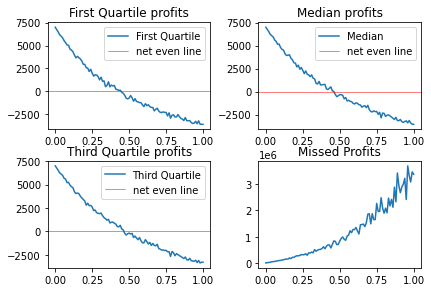

In [82]:
fig, axes = plt.subplots(nrows =2, ncols =2)
fig.tight_layout()

profits_single['First Quartile'].plot(ax = axes[0,0])
axes[0,0].axhline(y = 0, color = 'r', linestyle='-', linewidth = 0.5,label = 'net even line')
axes[0,0].set_title('First Quartile profits')
axes[0,0].legend()


profits_single['Median'].plot(ax = axes[0,1])
axes[0,1].axhline(y = 0, color = 'r', linestyle='-', linewidth = 0.5,label = 'net even line')
axes[0,1].legend()
axes[0,1].set_title('Median profits')

profits_single['Third Quartile'].plot(ax = axes[1,0])
axes[1,0].axhline(y = 0, color = 'r', linestyle='-', linewidth = 0.5,label = 'net even line')
axes[1,0].set_title('Third Quartile profits')
axes[1,0].legend()

profits_single['Missed profit'].plot(ax = axes[1,1])
axes[1,1].set_title('Missed Profits')

We note that the median and quartiles of profits declines rapidly as the volatility rises, and I am quite surprised that it declines this fast, hitting negatives even before a volatility of 50%.

# opportunity to reorder system

Now we move on the second case : having the possibility of ordering another time if demand is not met. This doesn't change our overage cost, but it changes our underage cost and thus critical fractile, which becomes $crit.fract = \frac{c'-c}{c'-s} = \frac{3}{7} \approx 0.429 $ \\
Since the code doesn't change, only the values, I'll reuse the code from above.

In [24]:
crit_fract = 3/7
prem_cost = 45
q = 0
median = 100
#z-score associated to the critical fractile
z = norm.ppf(crit_fract)
order_quantities_mult = []
#one order quantity per volatility value
for i in range(101):
  q = math.exp(i/100*z)*median
  order_quantities_mult.append((i/100,round(q,3)))

In [ ]:
order_quantities_mult

It is interesting to see that the higher the volatility, the safer we are on our order. \\
Now that we have our order quantity, we again compare to effective sales. Note that the "Missing Profits" is missing because it is not relevant, since we order again to make up for the missed sales (it supposes that every customer not satisfied will buy once the order arrives, which might be a bit simplistic but perfect for our case).

In [29]:
profits_mult = pd.DataFrame(columns=['Mean','standard deviation','First Quartile','Median','Third Quartile']) #we create a DataFrame that will store our final data
price = 100
cost = 30
prem_cost = 45
residual = 10
#I maybe forgot to convert datatypes from object to numeric which causes issues for the plotting
profits_mult['Mean'] = pd.to_numeric(profits_mult['Mean'],errors= 'coerce')
profits_mult['standard deviation'] = pd.to_numeric(profits_mult['standard deviation'],errors= 'coerce')
profits_mult['First Quartile'] = pd.to_numeric(profits_mult['First Quartile'],errors = 'coerce')
profits_mult['Median'] = pd.to_numeric(profits_mult['Median'],errors = 'coerce')
profits_mult['Third Quartile'] = pd.to_numeric(profits_mult['Third Quartile'],errors = 'coerce')
prof = 0
prof_vol = [] #profits per volatility, which gets cleared after each iteration. It will help to determine the quartiles

for volatility in range(len(random_demand.index)): #we iterate for every volatility
  prof_vol.clear()
  for observations in range(len(random_demand.columns)) : #we iterate for every observation
    Q = order_quantities_mult[volatility][1] #we want to access the 2nd info in our tuple, the quantity ordered for the associated volatility
    S = random_demand.iloc[volatility,observations] #using iloc is preferred since it accesses the index, and not the value associated
    if Q <= S : #if we order less or equal than is observed
      prof = Q*(price-cost) + (S-Q)*(price - prem_cost)
      prof_vol.append(prof)
    else : #if we order too much
      prof = S*(price-cost) + (Q-S)*(residual-cost)
      prof_vol.append(prof)
  average = round(sum(prof_vol)/len(prof_vol),3)
  first_quart = round(np.percentile(prof_vol,0.25),3)
  median = round(np.percentile(prof_vol,0.50),3)
  third_quart = round(np.percentile(prof_vol,0.75),3)
  stddev = round(statistics.stdev(prof_vol),3)
  #we then put everything into the dataframe
  profits_mult.loc[volatility/100] = [average,stddev,first_quart,median,third_quart]

In [30]:
profits_mult

,Mean,standard deviation,First Quartile,Median,Third Quartile
0.00,7000.000,0.000,7000.000,7000.000,7000.000
0.01,6991.042,69.598,6765.208,6786.415,6790.432
0.02,6973.178,143.800,6524.013,6555.559,6562.218
0.03,6960.032,214.453,6240.468,6292.249,6314.927
0.04,6966.879,283.435,6103.716,6152.810,6201.482
...,...,...,...,...,...
0.96,9786.813,15540.483,-1062.116,-898.715,-851.426
0.97,9458.649,11194.551,-704.288,-612.536,-592.706
0.98,9143.001,11126.199,-1036.763,-842.180,-821.416
0.99,9805.004,11127.524,-1009.473,-943.832,-712.920


This looks way better, however it is interesting to note that when the volatility closes to 100%, we are at a risk of making losses, even though it is greatly mitigated. Let's plot it !

Text(0.5, 1.0, 'Third Quartile profits')

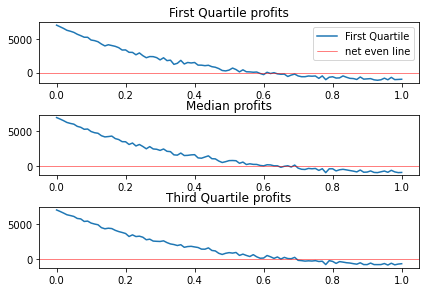

In [80]:
fig, axes = plt.subplots(3,1)
fig.tight_layout()

profits_mult['First Quartile'].plot(ax = axes[0])
axes[0].axhline(y = 0, color = 'r', linestyle='-', linewidth = 0.5,label = 'net even line')
axes[0].set_title('First Quartile profits')
axes[0].legend()

profits_mult['Median'].plot(ax = axes[1])
axes[1].axhline(y = 0, color = 'r', linestyle='-', linewidth = 0.5,label = 'net even line')
axes[1].set_title('Median profits')

profits_mult['Third Quartile'].plot(ax = axes[2])
axes[2].axhline(y = 0, color = 'r', linestyle='-', linewidth = 0.5,label = 'net even line')
axes[2].set_title('Third Quartile profits')



This looks way better ! We see that we are mostly positive, except for high volatilities.

# Comparison and conclusion

Now I want to see if there's a dominance between the alternatives. The fact that I only took moments of the profits and didn't keep raw data prevents me to determine a deterministic dominance, but we can at least see if it's stochastic.

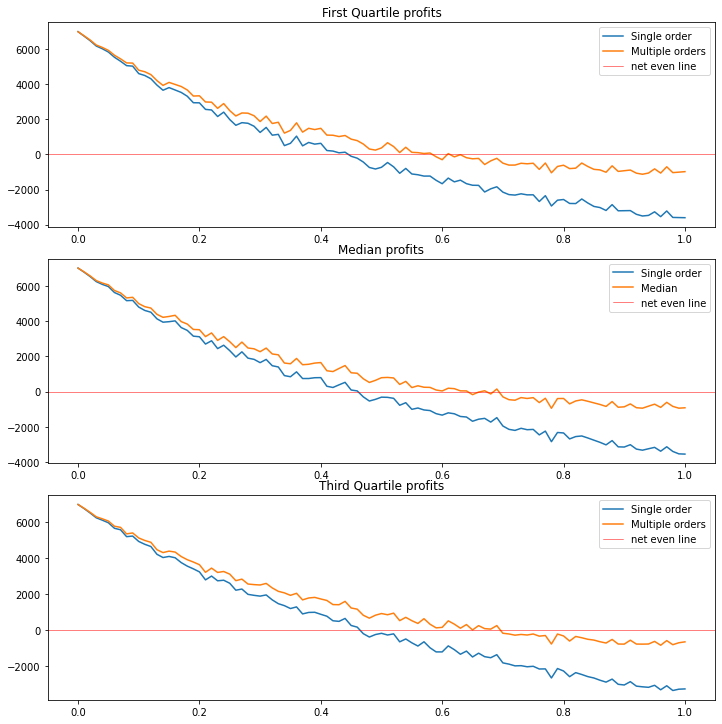

<Figure size 3600x720 with 0 Axes>

In [77]:
fig, axes = plt.subplots(nrows =3, ncols =1)
fig.set_figheight(10)
fig.set_figwidth(10)
fig.tight_layout()
plt.figure(figsize=(50,10))


profits_single['First Quartile'].plot(ax = axes[0], label = 'Single order')
profits_mult['First Quartile'].plot(ax = axes[0], label = 'Multiple orders')
axes[0].axhline(y = 0, color = 'r', linestyle='-', linewidth = 0.5, label = 'net even line')
axes[0].set_title('First Quartile profits')
axes[0].legend()

profits_single['Median'].plot(ax = axes[1],label = 'Single order')
profits_mult['Median'].plot(ax = axes[1])
axes[1].axhline(y = 0, color = 'r', linestyle='-', linewidth = 0.5,label = 'net even line')
axes[1].set_title('Median profits')
axes[1].legend()

profits_single['Third Quartile'].plot(ax = axes[2], label='Single order')
profits_mult['Third Quartile'].plot(ax = axes[2], label = 'Multiple orders')
axes[2].axhline(y = 0, color = 'r', linestyle='-', linewidth = 0.5,label = 'net even line')
axes[2].set_title('Third Quartile profits')
axes[2].legend()

We can clearly see that even though we play it safer by ordering twice (critical fractile is lower), it pays off in the long run because the premium cost isn't high enough in this case (obviously, the higher the premium cost, the more expensive it gets to mispredict demand). We can clearly see that the dominance is stochastic.

This result is a bit of a surprise to me, because I thought that this conclusion would depend on volatility. Sadly, Prof. de Treville you were right, once again. But at least I did the maths.